# Geospatial analysis

In [1]:
import pandas as pd
import numpy as np
import folium
import cartopy
import cartopy.crs as ccrs

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
flights_all = pd.read_csv('../data/clean_data/flights_data.csv', index_col=0)
ewr_flights = flights_all.loc[(flights_all['origin'] == 'EWR')].copy()

In [4]:
ewr_flights.isna().sum()

month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour            0
dep_delay_true       0
wind_dir             0
wind_speed           0
wind_gust            0
visib                0
temp_max             0
temp_min             0
temp_ave             0
temp_departure       0
ppt                  0
new_snow             0
snow_depth           0
ori_faa              0
ori_airport          0
ori_lat              0
ori_lon              0
ori_alt              0
ori_timezone         0
dest_faa          1689
dest_airport      1689
dest_lat          1689
dest_lon          1689
dest_alt          1689
dest_timezone     1689
carrier_name         0
type       

# Format ewr_flights for geospatial plotting 
Need to summarise the data per destination airport so that it can be plotted on a map.

88 different destination airports.

Summary columns 
- percentage delayed flights per destination airport sized by total number of flights?
- percentage delayed flights per destination airport coloured/sized by delay time?
- percentage delayed flights selecting top 5 delayed airlines on the route?


In [5]:
ewr_flights.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,...,dest_airport,dest_lat,dest_lon,dest_alt,dest_timezone,carrier_name,type,manufacturer,model,engine
1,1,1,545.0,545,0.0,833.0,831,2.0,B6,527,...,Orlando International Airport,28.429399,-81.308998,96.0,America/New_York,JetBlue Airways,Fixed wing multi engine,AIRBUS,A320-232,Turbo-fan
2,1,1,556.0,555,1.0,709.0,714,-5.0,UA,320,...,Washington Dulles International Airport,38.944500,-77.455803,312.0,America/New_York,United Air Lines Inc.,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,Turbo-fan
13,1,1,559.0,600,-1.0,848.0,904,-16.0,AA,1301,...,Miami International Airport,25.793200,-80.290604,8.0,America/New_York,American Airlines Inc.,Unknown,Unknown,Unknown,Unknown
14,1,1,557.0,600,-3.0,853.0,903,-10.0,B6,605,...,Fort Lauderdale Hollywood International Airport,26.072599,-80.152702,9.0,America/New_York,JetBlue Airways,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,Turbo-fan
20,1,1,731.0,655,36.0,830.0,808,22.0,UA,2016,...,General Edward Lawrence Logan International Ai...,42.364300,-71.005203,20.0,America/New_York,United Air Lines Inc.,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,Turbo-fan


In [6]:
ewr_flights.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour',
       'dep_delay_true', 'wind_dir', 'wind_speed', 'wind_gust', 'visib',
       'temp_max', 'temp_min', 'temp_ave', 'temp_departure', 'ppt', 'new_snow',
       'snow_depth', 'ori_faa', 'ori_airport', 'ori_lat', 'ori_lon', 'ori_alt',
       'ori_timezone', 'dest_faa', 'dest_airport', 'dest_lat', 'dest_lon',
       'dest_alt', 'dest_timezone', 'carrier_name', 'type', 'manufacturer',
       'model', 'engine'],
      dtype='object')

In [7]:
ewr_flights.groupby('flight')['dep_delay'].\
    agg('mean').sort_values(ascending = False).reset_index(name='mean_dep_delay')

,flight,mean_dep_delay
0,4268,200.666667
1,4627,199.000000
2,4044,160.500000
3,567,160.000000
4,267,149.500000
...,...,...
1817,603,-12.921053
1818,1448,-13.000000
1819,289,-14.000000
1820,2410,-14.000000


In [8]:
ewr_geo = ewr_flights.loc[:, ['ori_airport', 'ori_lat', 'ori_lon', 
'ori_alt','dest_airport', 'dest_lat', 'dest_lon', 'carrier_name', 'dep_delay', 
'dep_delay_true', 'air_time', 'distance', 'hour', 'wind_speed', 'visib']].copy()

In [9]:
ewr_geo.groupby('dest_airport')['dep_delay'].\
    agg('mean').sort_values(ascending = False).reset_index(name='mean_dep_delay')

,dest_airport,mean_dep_delay
0,Des Moines International Airport,50.570370
1,Fort Wayne International Airport,38.366460
2,Bishop International Airport,35.644860
3,South Bend Regional Airport,34.205251
4,Sacramento International Airport,32.740196
...,...,...
83,Pittsburgh International Airport,0.660000
84,Montrose Regional Airport,0.000000
85,Gallatin Field,-0.300000
86,Albany International Airport,-0.835821


In [10]:
ewr_geo.groupby(['dest_airport', 'carrier_name'])['dep_delay'].\
    agg('mean').sort_values(ascending = False).reset_index(name='mean_dep_delay_per_carrier')

,dest_airport,carrier_name,mean_dep_delay_per_carrier
0,McCarran International Airport,Southwest Airlines Co.,158.750000
1,Baltimore/Washington International Thurgood Ma...,United Air Lines Inc.,96.000000
2,Lambert St Louis International Airport,United Air Lines Inc.,57.262295
3,McGhee Tyson Airport,ExpressJet Airlines Inc.,53.372937
4,Des Moines International Airport,ExpressJet Airlines Inc.,50.570370
...,...,...,...
157,Louis Armstrong New Orleans International Airport,Spirit Air Lines,-3.120000
158,Pittsburgh International Airport,United Air Lines Inc.,-3.705882
159,Dane County Regional Truax Field,United Air Lines Inc.,-4.000000
160,Memphis International Airport,United Air Lines Inc.,-4.176471


In [11]:
ewr_geo.groupby('dest_airport')['dep_delay'].\
    agg('mean').sort_values(ascending = False).reset_index(name='mean_dep_delay')

ewr_geo.loc[:, 'mean_dep_delay_per_dest'] = \
    ewr_geo.groupby('dest_airport')['dep_delay'].transform('mean')

In [12]:
def percent_delay(df, col):
    df.loc[:, 'dep_delay_per_'+ col] = df.groupby([col]).dep_delay_true.transform('sum')
    df.loc[:, 'total_flights_per_' + col] = df.groupby([col]).dep_delay.transform('count')
    df.loc[:, 'percent_delay_per_' + col] = (df['dep_delay_per_'+ col] / df['total_flights_per_' + col]) * 100

In [13]:
ewr_unique_dest = ewr_geo.drop_duplicates(['dest_airport', 'mean_dep_delay_per_dest'])

In [14]:
ewr_unique_dest = ewr_unique_dest.loc[:, ['ori_airport', 'ori_lat', 'ori_lon', 
'ori_alt','dest_airport', 'dest_lat', 'dest_lon', 'mean_dep_delay_per_dest']].copy()

In [15]:
ewr_unique_dest.dropna(inplace = True)

# ready to plot ori airport to dest airport
Try to colour on mean_dep_delay_per_dest

In [16]:
# set figure print outs in notebook
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

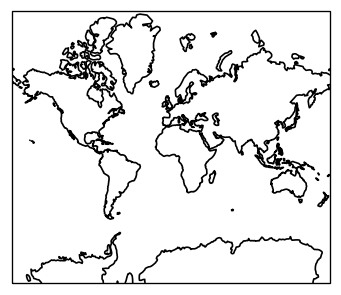

In [17]:
# background map
extent = [-150, -40, 5, 70]
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

In [18]:
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())

    plt.show()

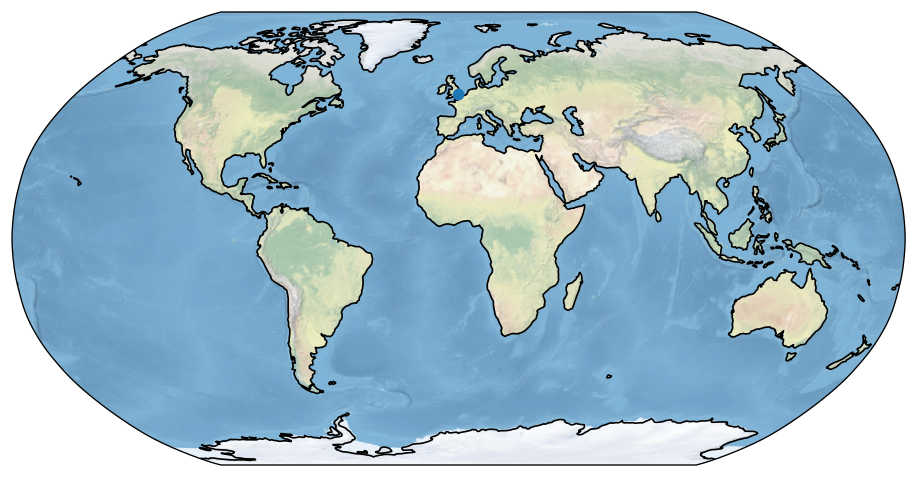

In [19]:
if __name__ == '__main__':
    main()

In [20]:
import geopandas as gpd
import plotly.graph_objects as go

In [21]:
ewr_unique_dest.head()

,ori_airport,ori_lat,ori_lon,ori_alt,dest_airport,dest_lat,dest_lon,mean_dep_delay_per_dest
1,Newark Liberty International Airport,40.692501,-74.168701,18,Orlando International Airport,28.429399,-81.308998,17.464316
2,Newark Liberty International Airport,40.692501,-74.168701,18,Washington Dulles International Airport,38.944500,-77.455803,11.095462
13,Newark Liberty International Airport,40.692501,-74.168701,18,Miami International Airport,25.793200,-80.290604,15.696905
14,Newark Liberty International Airport,40.692501,-74.168701,18,Fort Lauderdale Hollywood International Airport,26.072599,-80.152702,18.381081
20,Newark Liberty International Airport,40.692501,-74.168701,18,General Edward Lawrence Logan International Ai...,42.364300,-71.005203,18.538967


fig = go.Figure()

fig.add_trace(go.Scattergeo(
                        lat = [40.692501, 28.429399],
                        lon = [-74.168701, -81.308998],
                        mode = 'lines',
                        line = dict(width=1, color='blue')
                        ))

fig.update_layout(title_text = 'Connection Map Depicting Flights from Newark',
                  height=700, width=900,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False)

fig.show()

fig = go.Figure()

ori_to_dest = zip(ewr_unique_dest['ori_lat'], ewr_unique_dest['dest_lat'],
                     ewr_unique_dest['ori_lon'], ewr_unique_dest['dest_lon'],
                     ewr_unique_dest['mean_dep_delay_per_dest'])

## Loop through each flight entry
for ori_lat, dest_lat, ori_lon, dest_lon, mean_dep_delay in ori_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [ori_lat, dest_lat],
                        lon = [ori_lon, dest_lon],
                        mode = 'lines'
                        ))

fig.update_layout(title_text = 'Connection Map Depicting Flights from Newark',
                  height=700, width=900,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False)

fig.show()

In [22]:
ewr_unique_dest.shape

(88, 8)

In [23]:
ewr_unique_dest.describe(include = 'all')

,ori_airport,ori_lat,ori_lon,ori_alt,dest_airport,dest_lat,dest_lon,mean_dep_delay_per_dest
count,88,88.000000,88.000000,88.0,88,88.000000,88.000000,88.000000
unique,1,NaN,NaN,NaN,88,NaN,NaN,NaN
top,Newark Liberty International Airport,NaN,NaN,NaN,George Bush Intercontinental Houston Airport,NaN,NaN,NaN
freq,88,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,40.692501,-74.168701,18.0,NaN,37.965107,-91.232371,14.672711
std,NaN,0.000000,0.000000,0.0,NaN,6.021881,17.551302,8.630485
min,NaN,40.692501,-74.168701,18.0,NaN,21.318701,-157.921997,-0.975904
25%,NaN,40.692501,-74.168701,18.0,NaN,34.657399,-97.195976,10.223800
50%,NaN,40.692501,-74.168701,18.0,NaN,38.898300,-84.931450,14.752684
75%,NaN,40.692501,-74.168701,18.0,NaN,41.948825,-80.138426,18.347089


In [24]:
ewr_unique_dest['mean_dest_delay_color'] = ewr_unique_dest['mean_dep_delay_per_dest'] ** 2

In [25]:
ewr_unique_dest['mean_dest_delay_color'].round(0)

1          305.0
2          123.0
13         246.0
14         338.0
20         344.0
           ...  
123337     116.0
126987    1072.0
128409     173.0
145854       1.0
248455      54.0
Name: mean_dest_delay_color, Length: 88, dtype: float64

In [26]:
us_map = folium.Map(location=[40.6925, -74.1687], 
zoom_start = 7,
tiles="cartodbpositron")

In [27]:
ewr_unique_dest.isna().sum()

ori_airport                0
ori_lat                    0
ori_lon                    0
ori_alt                    0
dest_airport               0
dest_lat                   0
dest_lon                   0
mean_dep_delay_per_dest    0
mean_dest_delay_color      0
dtype: int64

In [28]:

    test_map = folium.Map([22.5, 22.5], zoom_start=3)

    color_line = folium.ColorLine(
        [[0, 0], [0, 45], [45, 45], [45, 0], [0, 0]],
        [0, 1, 2, 3],
        colormap=['b', 'g', 'y', 'r'],
        nb_steps=4,
        weight=10,
        opacity=1).add_to(test_map)

In [29]:
test_map = folium.Map(location=[51.5, -0.115],
                      zoom_start=13,
                      tiles='cartodbpositron')

folium.ColorLine([(51.49, -0.10),
                  (51.50, -0.105),
                  (51.51, -0.103),
                  (51.52, -0.11)],
                 colors = [0,1,2],
                 colormap = ['green', 'red'],
                 weight = 10,
                 opacity = 0.25).add_to(test_map)

test_map

In [30]:
for _, row in ewr_unique_dest.iterrows():

    folium.CircleMarker([row['ori_lat'], row['ori_lon']],
                        radius=5,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(us_map)

    folium.CircleMarker([row['dest_lat'], row['dest_lon']],
                        radius=5,
                        fill_color="red", # divvy color
                       ).add_to(us_map)

    folium.PolyLine([[row['ori_lat'], row['ori_lon']], 
                     [row['dest_lat'], row['dest_lon']]],
                     color = 'red').add_to(us_map)

>>> dict_speed = {}
>>> cities_all = df.index.to_list()
>>> 
>>> for origin in df.index:
...     dict_speed[origin] = {
...         desti: np.random.uniform(3, 30) for desti in cities_all if origin != desti
...     }
...     cities_all.remove(origin)
... 
>>> dict_speed
{'Amsterdam': {'Utrecht': 11.17300608896625, 'Haarlem': 28.078139459927645},
 'Utrecht': {'Haarlem': 17.07939077211872},
 'Haarlem': {}}

In [31]:
us_map

In [32]:
for _, row in ewr_unique_dest.iterrows():

    folium.CircleMarker([row['ori_lat'], row['ori_lon']],
                        radius=5,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(us_map)

    folium.CircleMarker([row['dest_lat'], row['dest_lon']],
                        radius=5,
                        fill_color="red", # divvy color
                       ).add_to(us_map)

    folium.PolyLine([[row['ori_lat'], row['ori_lon']], 
                     [row['dest_lat'], row['dest_lon']]],
                     color = 'red').add_to(us_map)

import plotly.express as px

fig = px.line_mapbox(ewr_unique_dest, lat="ori_lat", lon="ori_lon", color="dest_airport", zoom=3, height=300)

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=4, mapbox_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [37]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = [10, 20, 30],
    lat = [10, 20,30],
    marker = {'size': 10}))

fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="percent_delay_all_months")

fig.show()

In [34]:
import plotly.express as px

test_fig = px.line_mapbox(ewr_unique_dest,
lat='ori_lat',
lon='ori_lon',
color='mean_dep_delay_per_dest',
zoom=9,
height=600,
width=1300)

test_fig.update_layout(mapbox_style='carto-positron')
test_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
test_fig.update_layout(title_text="percent_delay_all_months")
test_fig.show()

In [36]:
https://plotly.com/python/lines-on-maps/
import plotly.graph_objects as go
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

flight_paths = []
for i in range(len(df_flight_paths)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

fig.update_layout(
    title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

NameError: name 'df_airports' is not defined

In [80]:
test_fig_2 = go.Figure()

ewr_unique_dest['ori_lon'] = ewr_unique_dest['ori_lon'].astype(str)
ewr_unique_dest['dest_lon'] = ewr_unique_dest['dest_lon'].astype(str)
ewr_unique_dest['ori_lat'] = ewr_unique_dest['ori_lat'].astype(str)
ewr_unique_dest['dest_lat'] = ewr_unique_dest['dest_lat'].astype(str)
ewr_unique_dest['mean_dest_delay_color'] = ewr_unique_dest['mean_dest_delay_color'].astype(str)

for i, row in ewr_unique_dest.iterrows():
    test_fig_2.add_trace(
        px.line_mapbox(ewr_unique_dest,
            lon = [row['ori_lon'][i], row['dest_lon'][i]],
            lat = [row['ori_lat'][i], row['dest_lat'][i]],
            color= [row['mean_dest_delay_color'][i], row['mean_dest_delay_color'][i]]
            )
        )

test_fig_2.update_layout(mapbox_style='carto-positron')
test_fig_2.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
test_fig_2.update_layout(title_text="percent_delay_all_months")
test_fig_2.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'color=0<br>lat=%{lat}<br>lon=%{lon}<extra></extra>',
              'lat': [0, 8],
              'legendgroup': '0',
              'line': {'color': '#636efa'},
              'lon': [7, 8],
              'mode': 'lines',
              'name': '0',
              'showlegend': True,
              'subplot': 'mapbox',
              'type': 'scattermapbox'}],
    'layout': {'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'mapbox': {'center': {'lat': 4.0, 'lon': 39.0}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}, 'zoom': 8},
               'margin': {'t': 60},
               'template': '...'}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'treemap', 'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [49]:
ewr_unique_dest['ori_dest_lat'] = ewr_unique_dest['ori_lat'].round(4).astype(str) + ', ' + ewr_unique_dest['dest_lat'].round(4).astype(str)
ewr_unique_dest['ori_dest_lon'] = ewr_unique_dest['ori_lon'].round(4).astype(str) + ', ' + ewr_unique_dest['dest_lon'].round(4).astype(str)

In [ ]:
ewr_unique_dest['ori_dest_lat'] = ewr_unique_dest['ori_lat'].round(4).astype(str) + ', ' + ewr_unique_dest['dest_lat'].round(4).astype(str)
ewr_unique_dest['ori_dest_lon'] = ewr_unique_dest['ori_lon'].round(4).astype(str) + ', ' + ewr_unique_dest['dest_lon'].round(4).astype(str)

In [81]:
ewr_unique_dest.head()

,ori_airport,ori_lat,ori_lon,ori_alt,dest_airport,dest_lat,dest_lon,mean_dep_delay_per_dest,mean_dest_delay_color,ori_dest_lat,ori_dest_lon
1,Newark Liberty International Airport,40.692501068115234,-74.168701171875,18,Orlando International Airport,28.429399490356445,-81.30899810791016,17.464316,305,"40.6925, 28.4294","-74.1687, -81.309"
2,Newark Liberty International Airport,40.692501068115234,-74.168701171875,18,Washington Dulles International Airport,38.94449997,-77.45580292,11.095462,123,"40.6925, 38.9445","-74.1687, -77.4558"
13,Newark Liberty International Airport,40.692501068115234,-74.168701171875,18,Miami International Airport,25.79319953918457,-80.29060363769531,15.696905,246,"40.6925, 25.7932","-74.1687, -80.2906"
14,Newark Liberty International Airport,40.692501068115234,-74.168701171875,18,Fort Lauderdale Hollywood International Airport,26.072599411010746,-80.15270233154297,18.381081,337,"40.6925, 26.0726","-74.1687, -80.1527"
20,Newark Liberty International Airport,40.692501068115234,-74.168701171875,18,General Edward Lawrence Logan International Ai...,42.36429977,-71.00520325,18.538967,343,"40.6925, 42.3643","-74.1687, -71.0052"


In [51]:
test_dataset = pd.DataFrame({
    'lat':[l],
    'lon':[],
    'airport':['Newark Liberty International Airport', 'Newark Liberty International Airport', ]
})

,ori_airport,ori_lat,ori_lon,ori_alt,dest_airport,dest_lat,dest_lon,mean_dep_delay_per_dest,mean_dest_delay_color,ori_dest_lat,ori_dest_lon
1,Newark Liberty International Airport,40.692501,-74.168701,18,Orlando International Airport,28.429399,-81.308998,17.464316,305.002335,"40.6925, 28.4294","-74.1687, -81.309"
2,Newark Liberty International Airport,40.692501,-74.168701,18,Washington Dulles International Airport,38.944500,-77.455803,11.095462,123.109269,"40.6925, 38.9445","-74.1687, -77.4558"
13,Newark Liberty International Airport,40.692501,-74.168701,18,Miami International Airport,25.793200,-80.290604,15.696905,246.392827,"40.6925, 25.7932","-74.1687, -80.2906"
14,Newark Liberty International Airport,40.692501,-74.168701,18,Fort Lauderdale Hollywood International Airport,26.072599,-80.152702,18.381081,337.864125,"40.6925, 26.0726","-74.1687, -80.1527"
20,Newark Liberty International Airport,40.692501,-74.168701,18,General Edward Lawrence Logan International Ai...,42.364300,-71.005203,18.538967,343.693280,"40.6925, 42.3643","-74.1687, -71.0052"


In [50]:
test_fig = 

for _, row in ewr_unique_dest.iterrows():

    folium.CircleMarker([row['ori_lat'], row['ori_lon']],
                        radius=5,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(us_map)
px.line_mapbox(ewr_unique_dest,
lat='ori_dest_lat',
lon='ori_dest_lon',
color='mean_dep_delay_per_dest',
zoom=9,
height=600,
width=1300)

test_fig.update_layout(mapbox_style='carto-positron')
test_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
test_fig.update_layout(title_text="percent_delay_all_months")
test_fig.show()

TypeError: Could not convert 40.6925, 28.429440.6925, 38.944540.6925, 25.793240.6925, 26.072640.6925, 42.364340.6925, 33.434340.6925, 41.978640.6925, 32.896840.6925, 35.21440.6925, 47.44940.6925, 27.975540.6925, 33.636740.6925, 37.61940.6925, 30.494140.6925, 36.080140.6925, 26.683240.6925, 41.411740.6925, 32.733640.6925, 39.861740.6925, 29.984440.6925, 44.471940.6925, 32.898640.6925, 30.194540.6925, 33.942540.6925, 26.536240.6925, 39.642640.6925, 32.127640.6925, 36.124540.6925, 21.318740.6925, 39.902440.6925, 42.940540.6925, 40.481240.6925, 34.895740.6925, 44.88240.6925, 41.78640.6925, 43.139940.6925, 27.395440.6925, 38.852140.6925, 39.717340.6925, 38.748740.6925, 43.607340.6925, 39.297640.6925, 45.777540.6925, 38.509840.6925, 36.097840.6925, 35.042440.6925, 40.788440.6925, 37.505240.6925, 35.035340.6925, 39.99840.6925, 36.894640.6925, 35.436240.6925, 38.036540.6925, 40.916140.6925, 33.675740.6925, 41.732640.6925, 43.646240.6925, 45.588740.6925, 42.212440.6925, 42.947240.6925, 29.533740.6925, 43.118940.6925, 42.880840.6925, 29.993440.6925, 42.965440.6925, 35.877640.6925, 35.81140.6925, 41.53440.6925, 41.708740.6925, 41.303240.6925, 40.978540.6925, 42.932640.6925, 39.048840.6925, 38.174440.6925, 39.175440.6925, 41.938940.6925, 42.748340.6925, 40.491540.6925, 41.338540.6925, 33.679740.6925, 43.111240.6925, 37.362640.6925, 44.807440.6925, 37.721340.6925, 38.695440.6925, 61.174440.6925, 44.741440.6925, 36.2819 to numeric

In [ ]:
px.line_mapbox(ewr_unique_dest,
lat='ori_dest_lat',
lon='ori_dest_lon',
color='mean_dep_delay_per_dest',
zoom=9,
height=600,
width=1300)

test_fig.update_layout(mapbox_style='carto-positron')
test_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
test_fig.update_layout(title_text="percent_delay_all_months")
test_fig.show()